# Feature engineering

New features created:
- hours_before_departure
- driver_account_age_days
- driver_trip_count
- departure_hour
- departure_weekday
- is_weekend
- is_holiday
- segment_cluster_popularity
- from_cluster_popularity
- to_cluster_popularity
- price_per_km
- is_long_trip
- price_x_popularity
- seats_x_distance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os

sys.path.append(os.path.abspath('../src'))

from feature_engineering import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_parquet('../data/processed/clean_dataset.parquet')

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (3349106, 22)


,driver_id,trip_id,segment_id,segment_datetime,published_date,signup_date,fixed_signup_country,is_main_segment,unit_seat_price_eur,seat_offered_count,...,segment_distance_km,from_lat,from_lon,to_lat,to_lon,is_auto_accept_mode,publication_site_id,success,fixed_signup_country_grouped,signup_country_missing
0,1396837,5582378,62200180,2015-06-10 17:00:00,2012-05-02,2010-09-08,FR,True,34.32,4,...,505,47.7413,7.34569,48.9667,2.533300,True,0,False,FR,False
1,3640947,5660204,62979529,2015-05-10 02:40:00,2012-05-10,2012-05-02,FR,True,11.88,3,...,180,48.8517,2.34040,49.1459,0.227849,False,0,False,FR,False
2,3834551,5915312,65467862,2015-06-04 01:50:00,2012-06-04,2012-06-04,FR,True,22.44,3,...,352,48.8517,2.34040,48.0835,-1.682720,True,0,False,FR,False
3,3680123,5994384,66264106,2015-06-12 02:30:00,2012-06-12,2012-05-10,FR,False,7.92,2,...,402,48.8517,2.34040,45.7833,3.083250,False,0,False,FR,False
4,3680123,5994384,66264107,2015-06-12 02:30:00,2012-06-12,2012-05-10,FR,False,15.84,2,...,598,48.8517,2.34040,44.8350,-0.587269,False,0,False,FR,False


In [3]:
df.columns

Index(['driver_id', 'trip_id', 'segment_id', 'segment_datetime',
       'published_date', 'signup_date', 'fixed_signup_country',
       'is_main_segment', 'unit_seat_price_eur', 'seat_offered_count',
       'seat_left_count', 'confirmed_seat_count', 'segment_distance_km',
       'from_lat', 'from_lon', 'to_lat', 'to_lon', 'is_auto_accept_mode',
       'publication_site_id', 'success', 'fixed_signup_country_grouped',
       'signup_country_missing'],
      dtype='object')

## Simple features creation

In [4]:
# How early is the publication
df["hours_before_departure"] = ((df["segment_datetime"] - df["published_date"]).dt.total_seconds() / 3600).round(2)

# Driver seniority
df["driver_account_age_days"] = (df["segment_datetime"] - df["signup_date"]).dt.days

# Total number of trips per driver
driver_trip_count = df.groupby("driver_id")["trip_id"].nunique().rename("driver_trip_count")
df = df.merge(driver_trip_count, on="driver_id", how="left")

df.head()

,driver_id,trip_id,segment_id,segment_datetime,published_date,signup_date,fixed_signup_country,is_main_segment,unit_seat_price_eur,seat_offered_count,...,to_lat,to_lon,is_auto_accept_mode,publication_site_id,success,fixed_signup_country_grouped,signup_country_missing,hours_before_departure,driver_account_age_days,driver_trip_count
0,1396837,5582378,62200180,2015-06-10 17:00:00,2012-05-02,2010-09-08,FR,True,34.32,4,...,48.9667,2.533300,True,0,False,FR,False,27233.00,1736,1
1,3640947,5660204,62979529,2015-05-10 02:40:00,2012-05-10,2012-05-02,FR,True,11.88,3,...,49.1459,0.227849,False,0,False,FR,False,26282.67,1103,1
2,3834551,5915312,65467862,2015-06-04 01:50:00,2012-06-04,2012-06-04,FR,True,22.44,3,...,48.0835,-1.682720,True,0,False,FR,False,26281.83,1095,1
3,3680123,5994384,66264106,2015-06-12 02:30:00,2012-06-12,2012-05-10,FR,False,7.92,2,...,45.7833,3.083250,False,0,False,FR,False,26282.50,1128,1
4,3680123,5994384,66264107,2015-06-12 02:30:00,2012-06-12,2012-05-10,FR,False,15.84,2,...,44.8350,-0.587269,False,0,False,FR,False,26282.50,1128,1


## Temporal features creation

In [ ]:
df["departure_hour"] = df["segment_datetime"].dt.hour
df["departure_weekday"] = df["segment_datetime"].dt.weekday # 0 = monday
df["is_weekend"] = df["departure_weekday"].isin([5, 6]).astype(int)
df.head()

,driver_id,trip_id,segment_id,segment_datetime,published_date,signup_date,fixed_signup_country,is_main_segment,unit_seat_price_eur,seat_offered_count,...,publication_site_id,success,fixed_signup_country_grouped,signup_country_missing,hours_before_departure,driver_account_age_days,driver_trip_count,departure_hour,departure_weekday,is_weekend
0,1396837,5582378,62200180,2015-06-10 17:00:00,2012-05-02,2010-09-08,FR,True,34.32,4,...,0,False,FR,False,27233.00,1736,1,17,2,0
1,3640947,5660204,62979529,2015-05-10 02:40:00,2012-05-10,2012-05-02,FR,True,11.88,3,...,0,False,FR,False,26282.67,1103,1,2,6,1
2,3834551,5915312,65467862,2015-06-04 01:50:00,2012-06-04,2012-06-04,FR,True,22.44,3,...,0,False,FR,False,26281.83,1095,1,1,3,0
3,3680123,5994384,66264106,2015-06-12 02:30:00,2012-06-12,2012-05-10,FR,False,7.92,2,...,0,False,FR,False,26282.50,1128,1,2,4,0
4,3680123,5994384,66264107,2015-06-12 02:30:00,2012-06-12,2012-05-10,FR,False,15.84,2,...,0,False,FR,False,26282.50,1128,1,2,4,0


Creating a variable to determine whether or not it's vacation time.

/!\ Limit: here I consider that the country of the trip is the country of the signup country. Chances are high that the majority of trips are made in the same country as the reference country, but not always exact, and for trips close to borders, the effect of public holidays may not be relevant. I'm still going to accept the possibility of a bit of noise, as it amounts to adding a variable that makes a lot of business sense to me.

In [6]:
# Cleaning countries values (remove space)
df['fixed_signup_country'] = df['fixed_signup_country'].str.strip()

df['is_holiday'] = df.apply(is_holiday, axis=1)
df.head()

,driver_id,trip_id,segment_id,segment_datetime,published_date,signup_date,fixed_signup_country,is_main_segment,unit_seat_price_eur,seat_offered_count,...,success,fixed_signup_country_grouped,signup_country_missing,hours_before_departure,driver_account_age_days,driver_trip_count,departure_hour,departure_weekday,is_weekend,is_holiday
0,1396837,5582378,62200180,2015-06-10 17:00:00,2012-05-02,2010-09-08,FR,True,34.32,4,...,False,FR,False,27233.00,1736,1,17,2,0,False
1,3640947,5660204,62979529,2015-05-10 02:40:00,2012-05-10,2012-05-02,FR,True,11.88,3,...,False,FR,False,26282.67,1103,1,2,6,1,False
2,3834551,5915312,65467862,2015-06-04 01:50:00,2012-06-04,2012-06-04,FR,True,22.44,3,...,False,FR,False,26281.83,1095,1,1,3,0,False
3,3680123,5994384,66264106,2015-06-12 02:30:00,2012-06-12,2012-05-10,FR,False,7.92,2,...,False,FR,False,26282.50,1128,1,2,4,0,False
4,3680123,5994384,66264107,2015-06-12 02:30:00,2012-06-12,2012-05-10,FR,False,15.84,2,...,False,FR,False,26282.50,1128,1,2,4,0,False


## Geographical features

All points are grouped together within a radius of around 10-12 km (using round(1)), which corresponds to a city or larger district.

In [7]:
# Creating geographic clusters
df["from_cluster"] = df["from_lat"].round(1).astype(str) + "," + df["from_lon"].round(1).astype(str)
df["to_cluster"] = df["to_lat"].round(1).astype(str) + "," + df["to_lon"].round(1).astype(str)

# Approximation of the segment
df["segment_cluster"] = df["from_cluster"] + " -> " + df["to_cluster"]

# Popularity of the segemnt and the departure and arrival points
df["segment_cluster_popularity"] = df.groupby("segment_cluster")["segment_id"].transform("count")
df["from_cluster_popularity"] = df.groupby("from_cluster")["segment_id"].transform("count")
df["to_cluster_popularity"] = df.groupby("to_cluster")["segment_id"].transform("count")

# We can remove the cluster feature
df.drop(['from_cluster', 'to_cluster', 'segment_cluster'], axis=1, inplace=True)
df.head()

,driver_id,trip_id,segment_id,segment_datetime,published_date,signup_date,fixed_signup_country,is_main_segment,unit_seat_price_eur,seat_offered_count,...,hours_before_departure,driver_account_age_days,driver_trip_count,departure_hour,departure_weekday,is_weekend,is_holiday,segment_cluster_popularity,from_cluster_popularity,to_cluster_popularity
0,1396837,5582378,62200180,2015-06-10 17:00:00,2012-05-02,2010-09-08,FR,True,34.32,4,...,27233.00,1736,1,17,2,0,False,2,2456,4080
1,3640947,5660204,62979529,2015-05-10 02:40:00,2012-05-10,2012-05-02,FR,True,11.88,3,...,26282.67,1103,1,2,6,1,False,34,14488,1531
2,3834551,5915312,65467862,2015-06-04 01:50:00,2012-06-04,2012-06-04,FR,True,22.44,3,...,26281.83,1095,1,1,3,0,False,334,14488,51487
3,3680123,5994384,66264106,2015-06-12 02:30:00,2012-06-12,2012-05-10,FR,False,7.92,2,...,26282.50,1128,1,2,4,0,False,143,14488,40425
4,3680123,5994384,66264107,2015-06-12 02:30:00,2012-06-12,2012-05-10,FR,False,15.84,2,...,26282.50,1128,1,2,4,0,False,219,14488,60414


## Interaction features

In [8]:
# Price per km
df["price_per_km"] = df["unit_seat_price_eur"] / df["segment_distance_km"]

# Long drives
df["is_long_trip"] = (df["segment_distance_km"] > 500).astype(int)

df["price_x_popularity"] = df["unit_seat_price_eur"] * df["segment_cluster_popularity"]
df["seats_x_distance"] = df["seat_offered_count"] * df["segment_distance_km"]

df.head()

,driver_id,trip_id,segment_id,segment_datetime,published_date,signup_date,fixed_signup_country,is_main_segment,unit_seat_price_eur,seat_offered_count,...,departure_weekday,is_weekend,is_holiday,segment_cluster_popularity,from_cluster_popularity,to_cluster_popularity,price_per_km,is_long_trip,price_x_popularity,seats_x_distance
0,1396837,5582378,62200180,2015-06-10 17:00:00,2012-05-02,2010-09-08,FR,True,34.32,4,...,2,0,False,2,2456,4080,0.067960,1,68.64,2020
1,3640947,5660204,62979529,2015-05-10 02:40:00,2012-05-10,2012-05-02,FR,True,11.88,3,...,6,1,False,34,14488,1531,0.066000,0,403.92,540
2,3834551,5915312,65467862,2015-06-04 01:50:00,2012-06-04,2012-06-04,FR,True,22.44,3,...,3,0,False,334,14488,51487,0.063750,0,7494.96,1056
3,3680123,5994384,66264106,2015-06-12 02:30:00,2012-06-12,2012-05-10,FR,False,7.92,2,...,4,0,False,143,14488,40425,0.019701,0,1132.56,804
4,3680123,5994384,66264107,2015-06-12 02:30:00,2012-06-12,2012-05-10,FR,False,15.84,2,...,4,0,False,219,14488,60414,0.026488,1,3468.96,1196


## Exploratory analysis of new features

,hours_before_departure,driver_account_age_days,departure_hour,departure_weekday,price_per_km,segment_cluster_popularity,from_cluster_popularity,to_cluster_popularity,driver_trip_count,price_x_popularity,seats_x_distance,is_weekend,is_long_trip
count,3.349106e+06,3.349106e+06,3.349106e+06,3.349106e+06,3.349106e+06,3.349106e+06,3.349106e+06,3.349106e+06,3.349106e+06,3.349106e+06,3.349106e+06,3.349106e+06,3.349106e+06
mean,2.043008e+02,7.303916e+02,1.382474e+01,3.470660e+00,8.121330e-02,2.858449e+02,1.422389e+04,1.414905e+04,2.304893e+00,3.790142e+03,5.959005e+02,3.458923e-01,1.023357e-01
std,3.011725e+02,6.541785e+02,4.592363e+00,2.020504e+00,1.358970e-01,5.669172e+02,1.690240e+04,1.703974e+04,2.397491e+00,8.600365e+03,5.919384e+02,4.756584e-01,3.030893e-01
min,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,3.508772e-04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.254000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.008000e+01,2.060000e+02,1.000000e+01,2.000000e+00,7.053435e-02,7.000000e+00,1.312000e+03,1.276000e+03,1.000000e+00,8.069160e+01,1.980000e+02,0.000000e+00,0.000000e+00
50%,1.132600e+02,5.630000e+02,1.400000e+01,4.000000e+00,7.882166e-02,5.100000e+01,7.039000e+03,6.919000e+03,2.000000e+00,5.438400e+02,4.200000e+02,0.000000e+00,0.000000e+00
75%,2.275000e+02,1.112000e+03,1.700000e+01,5.000000e+00,8.425532e-02,2.660000e+02,1.955300e+04,1.912300e+04,3.000000e+00,3.429360e+03,8.040000e+02,1.000000e+00,0.000000e+00
max,2.995450e+04,4.055000e+03,2.300000e+01,6.000000e+00,8.844000e+01,4.117000e+03,6.371500e+04,6.380400e+04,4.100000e+01,4.885531e+05,2.227600e+04,1.000000e+00,1.000000e+00


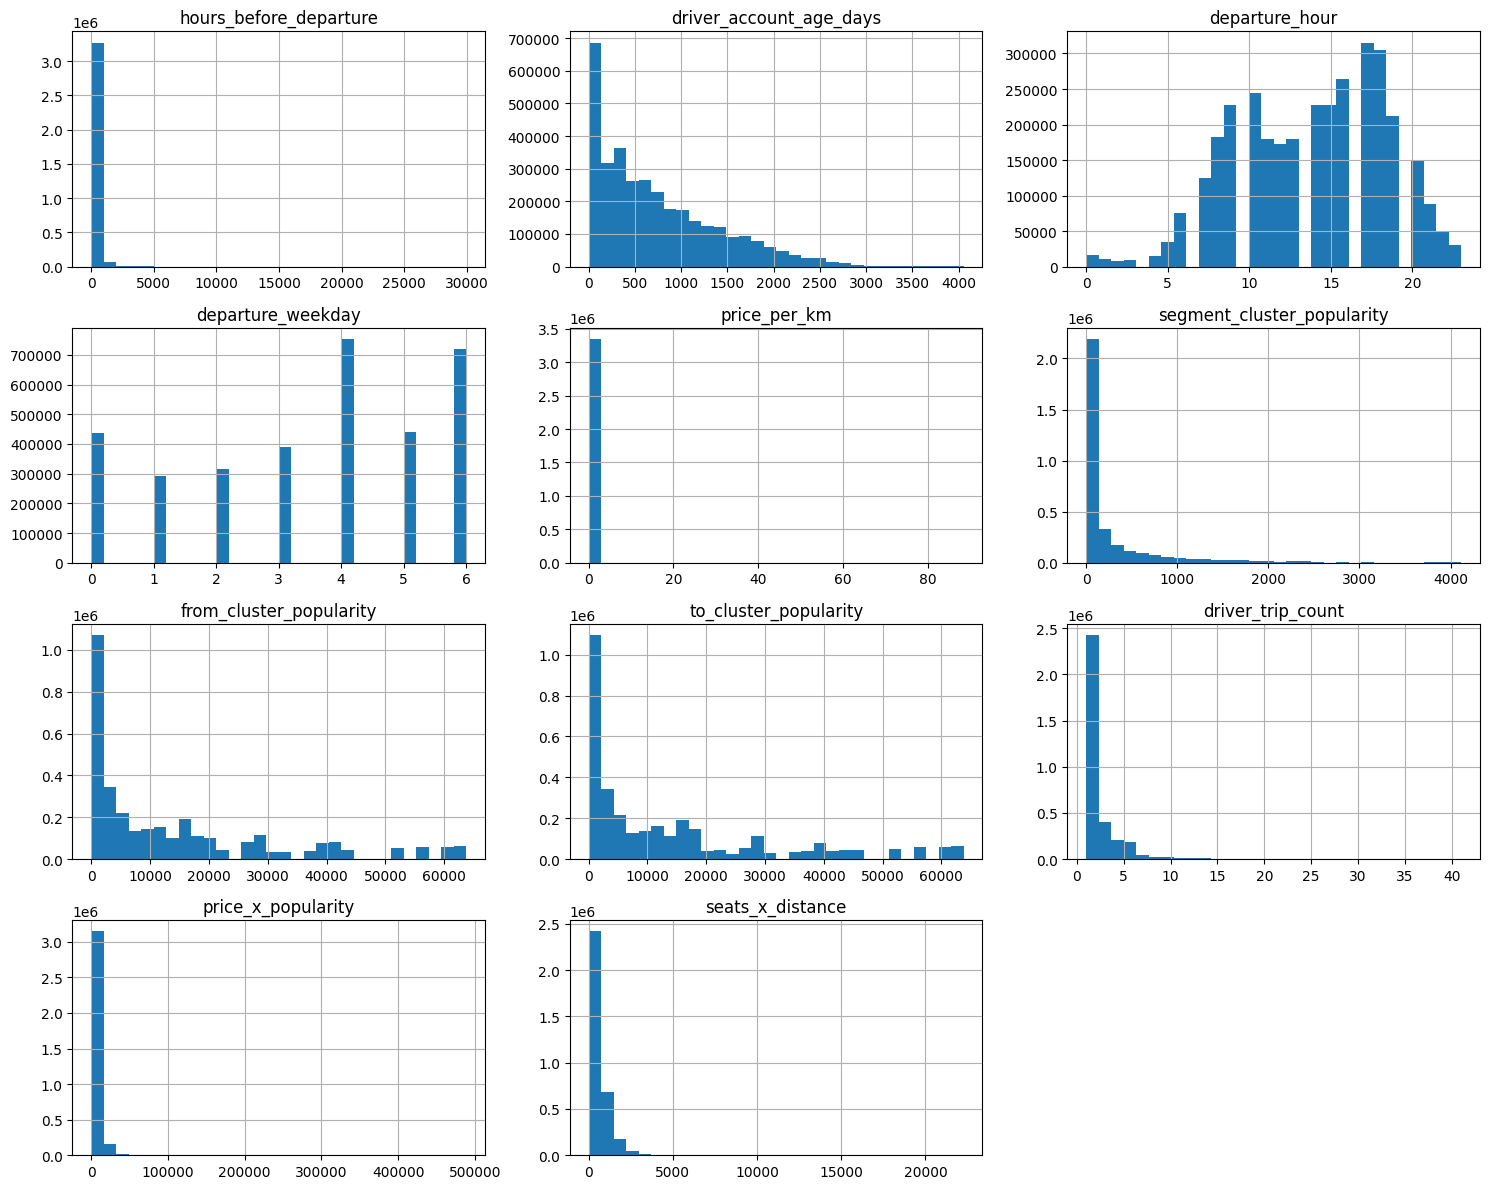

Values for is_weekend:
is_weekend
0    0.654108
1    0.345892
Name: proportion, dtype: float64
Values for is_long_trip:
is_long_trip
0    0.897664
1    0.102336
Name: proportion, dtype: float64
Values for is_holiday:
is_holiday
False    0.948672
True     0.051328
Name: proportion, dtype: float64


In [9]:
numerical_features_to_analyze = [
    'hours_before_departure', 'driver_account_age_days',
    'departure_hour', 'departure_weekday',
    'price_per_km', 'segment_cluster_popularity',
    'from_cluster_popularity', 'to_cluster_popularity', 'driver_trip_count',
    'price_x_popularity', 'seats_x_distance'
]

categorical_features_to_analyze = [
    'is_weekend', 'is_long_trip', 'is_holiday'
]

display(df[numerical_features_to_analyze+categorical_features_to_analyze].describe())

# Histograms for numerical features
num_vars = df[numerical_features_to_analyze].select_dtypes(include='number').columns
df[num_vars].hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()

# Values frequency for categorical/boolean features
cat_vars = [col for col in categorical_features_to_analyze if df[col].dtype == "object" or df[col].nunique() < 10]
for col in cat_vars:
    print(f"Values for {col}:")
    print(df[col].value_counts(normalize=True))


## Saving dataset

In [10]:
df.to_parquet("../data/processed/enriched_dataset.parquet")